# Wstęp do Uczenia Maszynowego - Lab 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed = 42

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)

In [4]:
map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ROC AUC

In [6]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(y_true, y_proba):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_true, y_hat_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

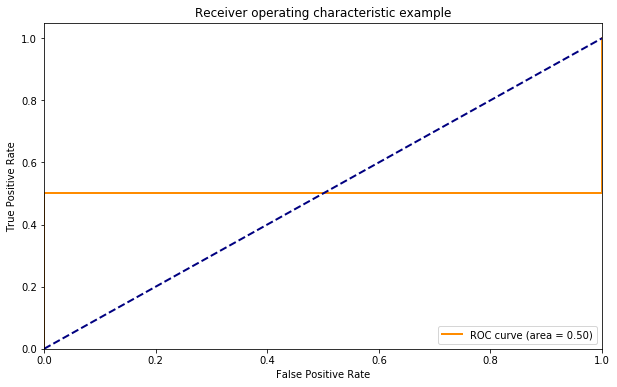

In [7]:
y_true = [1,0,0,1]
y_hat_proba = [0.2,0.4,0.6,0.8]
plot_roc_auc(y_true, y_hat_proba)

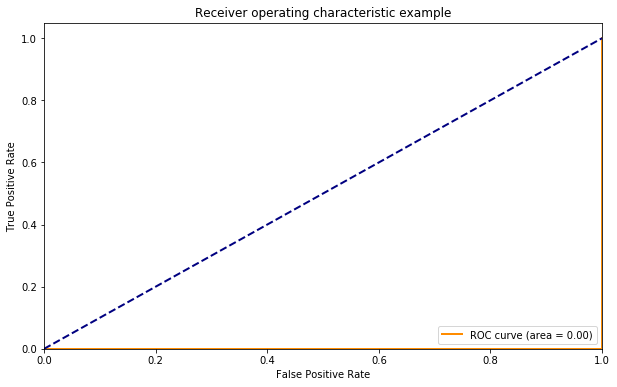

In [8]:
y_true = [1,1,1,0]
y_hat_proba = [0.2,0.4,0.6,0.8]
plot_roc_auc(y_true, y_hat_proba)

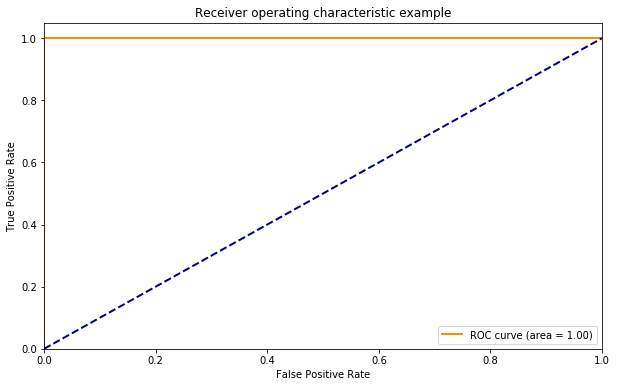

In [9]:
y_true = [0,0,0,1]
y_hat_proba = [0.2,0.4,0.6,0.8]
plot_roc_auc(y_true, y_hat_proba)

## Ensemble Methods

#### Random Forest
Najbardziej popularny algorytm Baggingowy.

Cechy:
- podstawowym algorytmem jest Drzewo Decyzyjne (wszystkie zalety drzew: obsługa NA)
- Do podziału każdego węzła wykorzystujemy losowe zmienne (ilość można wybrać jako hiperparametr)
- wbudowana metoda istotności zmiennych

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model_rf = RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                  max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                  min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                  max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                  random_state=0,
                                  n_jobs = -1)
model_rf.fit(X_train, y_train)
model_rf.score(X_test,y_test)

0.7204301075268817

### Boosting
Boosting działa podobnie jak Bagging z jedną różnicą. Każda kolejna próba bootstrap jest tworzona w taki sposób, że losuje z większym prawdopodobieństwiem obserwacje **źle sklasyfikowane**. W skrócie: Boosting uczy się na błędach, które popełnił w poprzednich iteracjach.

#### AdaBoost
Najprostsza metoda boostingowa

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7204301075268817

#### Gradient Boosting
Każdy nowy "słaby" model jest uczony na błędach poprzednich.

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
model= GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7204301075268817

#### XGBoost
Zaawansowana implementacja Gradient Boostingu

In [16]:
from xgboost import XGBClassifier # Inna paczka niż sklearn!

In [17]:
model=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    nround = 100, # Ilość itereacji boosingowych
                    max_depth=4 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7526881720430108